In [1]:
# general imports:
from astropy.table import Column, Table, join
from matplotlib import pyplot as plt
from astropy.io import fits
import pandas as pd
import numpy as np

# ANN predictor imports:
from wise_ml.models import predictors

In [2]:
train_test_d4_2 = pd.read_csv('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/AGN_BBH_overlap/data/r90_d4_2.csv')
train_test_d4_15 = pd.read_csv('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/AGN_BBH_overlap/data/r90_d4_15.csv')
train_test_d2_2 = pd.read_csv('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/AGN_BBH_overlap/data/r90_d2_2.csv')
train_test_d2_15 = pd.read_csv('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/AGN_BBH_overlap/data/r90_d2_15.csv')

In [3]:
train_test_d4_2[train_test_d4_2['REDSHIFT']>2]

,Unnamed: 0,REDSHIFT,WISEA,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,PREDICTED_2_REDSHIFT


In [4]:
train_test_d4_15[:5]

,Unnamed: 0,REDSHIFT,WISEA,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,PREDICTED_15_REDSHIFT
0,5,1.227,J000001.26+070128.7,14.627,0.032,13.274,0.031,10.399,0.099,7.866,0.208,1.166666
1,6,1.356,J000001.28-020159.7,14.888,0.034,13.519,0.035,10.444,0.088,8.145,0.259,1.223526
2,9,0.508,J000002.92-350332.5,12.685,0.023,11.547,0.021,8.871,0.029,6.500,0.059,0.531957
3,16,1.204,J000009.26+151754.4,15.558,0.044,14.127,0.043,10.897,0.138,8.211,0.395,1.300517
4,22,0.460,J000011.41+145545.7,14.281,0.028,13.225,0.030,10.662,0.114,8.150,0.288,0.615966


In [5]:
train_test_d2_2[:5]

,Unnamed: 0,REDSHIFT,WISEA,W1mag,e_W1mag,W2mag,e_W2mag,PREDICTED_2_REDSHIFT
0,2,1.61885,J000000.98+044947.1,15.503,0.044,13.987,0.044,1.474280
1,5,1.22700,J000001.26+070128.7,14.627,0.032,13.274,0.031,1.233182
2,6,1.35600,J000001.28-020159.7,14.888,0.034,13.519,0.035,1.313222
3,9,0.50800,J000002.92-350332.5,12.685,0.023,11.547,0.021,0.478809
4,11,1.81900,J000003.30+105744.5,16.027,0.058,14.834,0.070,1.490523


In [6]:
train_test_d2_15[:5]

,Unnamed: 0,REDSHIFT,WISEA,W1mag,e_W1mag,W2mag,e_W2mag,PREDICTED_15_REDSHIFT
0,5,1.22700,J000001.26+070128.7,14.627,0.032,13.274,0.031,1.091561
1,6,1.35600,J000001.28-020159.7,14.888,0.034,13.519,0.035,1.173258
2,9,0.50800,J000002.92-350332.5,12.685,0.023,11.547,0.021,0.457549
3,16,1.20400,J000009.26+151754.4,15.558,0.044,14.127,0.043,1.274997
4,17,1.43556,J000009.27+020621.9,15.555,0.044,14.170,0.045,1.261461


In [7]:
# final plots:
test_overlap_2 = train_test_d2_2.merge(train_test_d4_2, how='inner', on=['WISEA'])
test_overlap_15 = train_test_d2_15.merge(train_test_d4_15, how='inner', on=['WISEA'])

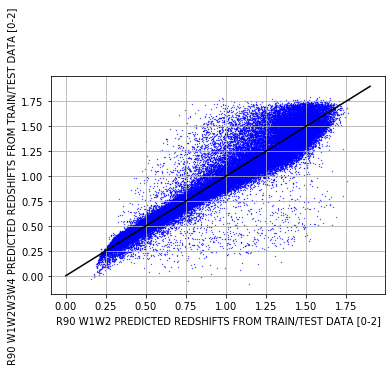

In [8]:
# predicted redshift using 0-2 predictor for 2 vs 4 band:
plt.scatter(test_overlap_2['PREDICTED_2_REDSHIFT_x'], 
            test_overlap_2['PREDICTED_2_REDSHIFT_y'], 
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.ylabel('R90 W1W2W3W4 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.savefig('plots/traintest_predicted_z_comparison_2.pdf')
plt.show()

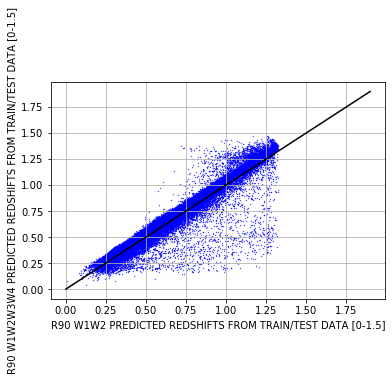

In [9]:
# predicted redshift using 0-1.5 predictor for 2 vs 4 band:
plt.scatter(test_overlap_15['PREDICTED_15_REDSHIFT_x'], 
            test_overlap_15['PREDICTED_15_REDSHIFT_y'], 
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.ylabel('R90 W1W2W3W4 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.savefig('plots/traintest_predicted_z_comparison_15.pdf')
plt.show()

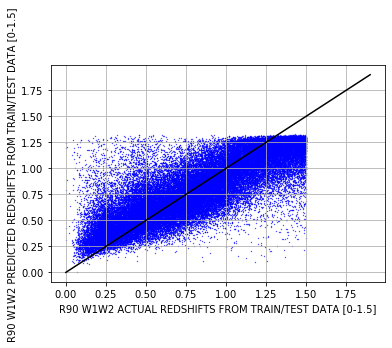

In [10]:
# predicted vs actual redshift using 0-1.5 predictor for 2 band data:
plt.scatter(test_overlap_15['REDSHIFT_x'],
            test_overlap_15['PREDICTED_15_REDSHIFT_x'],
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2 ACTUAL REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.ylabel('R90 W1W2 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.savefig('plots/traintest_predXact_W1W2_15.pdf')
plt.show()

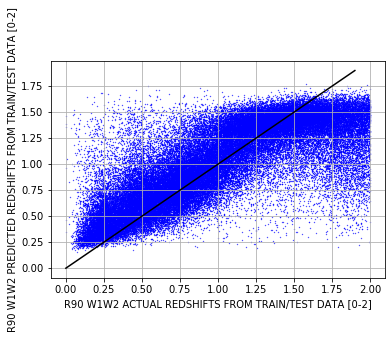

In [11]:
# predicted vs actual redshift using 0-2 predictor for 2 band data:
plt.scatter(test_overlap_2['REDSHIFT_x'],
            test_overlap_2['PREDICTED_2_REDSHIFT_x'],
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2 ACTUAL REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.ylabel('R90 W1W2 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.savefig('plots/traintest_predXact_W1W2_2.pdf')
plt.show()

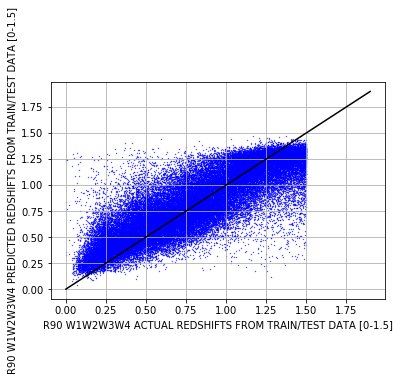

In [12]:
# predicted vs actual redshift using 0-1.5 predictor for 4 band data:
plt.scatter(test_overlap_15['REDSHIFT_x'],
            test_overlap_15['PREDICTED_15_REDSHIFT_y'],
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2W3W4 ACTUAL REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.ylabel('R90 W1W2W3W4 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.savefig('plots/traintest_predXact_W1W2W3W4_15.pdf')
plt.show()

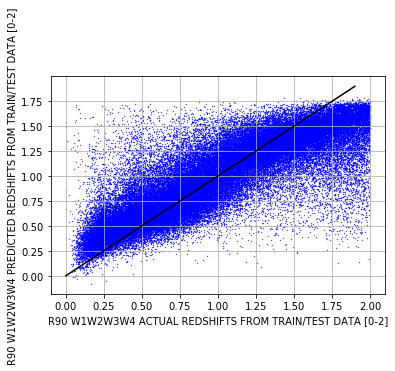

In [13]:
# predicted vs actual redshift using 0-2 predictor for 4 band data:
plt.scatter(test_overlap_2['REDSHIFT_x'],
            test_overlap_2['PREDICTED_2_REDSHIFT_y'],
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2W3W4 ACTUAL REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.ylabel('R90 W1W2W3W4 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.savefig('plots/traintest_predXact_W1W2W3W4_2.pdf')
plt.show()

Since this looks good, we will now predict the redshifts from the actual data set. We chose range [0-2] for the 4 band data:

In [14]:
# 4 band photometric data from r90:
data_4 = pd.read_pickle('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/AGN_BBH_overlap/data/WISE_ML/predict_W1W2W3W4.pkl')

In [30]:
data_4[:5]

,WISEA,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,PREDICTED_REDSHIFT
0,J000000.06-473835.1,14.086,0.027,13.233,0.028,9.987,0.048,7.551,0.155,0.369175
1,J000000.15+353104.1,14.522,0.030,13.372,0.031,10.663,0.102,8.180,0.246,0.774424
2,J000000.15-200427.7,13.548,0.026,12.539,0.025,9.727,0.053,7.248,0.131,0.461645
3,J000000.23-783204.1,15.212,0.031,13.694,0.028,10.388,0.055,8.046,0.183,1.517064
4,J000000.30-325326.7,16.392,0.065,15.323,0.087,12.318,0.353,8.907,0.429,1.150891


In [21]:
# specifying 2 redshift range:
redshift_2_range = [0, 2.0]

# predicting redshift:
predicted_redshifts = predictors.predict_redshift(data_4.iloc[:, 1:9:2],
                                                  redshift_range = redshift_2_range,
                                                  n_inputs = 4)

In [35]:
len(predicted_redshifts)

1141935

In [29]:
# creating column:
data_4['PREDICTED_REDSHIFT'] = predicted_redshifts

In [36]:
# saving file:
data_4.to_csv('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/AGN_BBH_overlap/data/r90_4band_predicted.csv')